In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
def CPM(a1):
    #selecting those columns which have only numeric value
    a=a1._get_numeric_data()
    try:
        cpm=[]
        for i in range(0,len(a.columns)):
                colsum=a.iloc[:,i].sum()

                c1=(a.iloc[:,i]/colsum)*10**6
                cpm.append(c1)
    
    except:
        print("ignore error")
    #converting cpm lists into array
    cpm=np.array(cpm)
    
    return cpm

In [3]:
data=pd.read_csv('GSE145011_A549_WT_KO_readcounts.txt.gz',sep="\t")
#taking data index into a variable
g1=data.index
g1

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2MP1',
       'A3GALT2', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=27964)

In [4]:
#calling cpm function
cpm=CPM(data)

In [5]:
##calculating log base 2 values of cpm matrix
logv=np.log2(cpm+1)  #cpm+1 is a call of psuedo count which helps 

In [6]:
logv

array([[1.78139574, 1.13824386, 0.16818715, ..., 8.40421458, 6.86967774,
        6.03320367],
       [1.66940767, 1.01440541, 0.31756322, ..., 8.27952701, 6.79133312,
        6.240761  ],
       [1.79231126, 1.10495554, 0.26040487, ..., 8.43127929, 6.8393264 ,
        6.10199939],
       [1.88149795, 0.92753012, 0.42613109, ..., 7.20638086, 6.96038859,
        5.72543931],
       [1.81582891, 1.03219573, 0.67291604, ..., 7.33612128, 7.02375816,
        5.64203396],
       [1.98464656, 0.94734125, 0.64275439, ..., 7.29045065, 6.95308685,
        5.80533751]])

In [7]:
#converting logcpm array to dataframe
lg=pd.DataFrame(logv).T
#now replacing logcpm column with those numerical column of the dataset
lg.columns=data.columns
#indexing genename of logcpm
lg.index=g1
lg


,A549_KO1,A549_KO2,A549_KO3,A549_WT1,A549_WT2,A549_WT3
A1BG,1.781396,1.669408,1.792311,1.881498,1.815829,1.984647
A1BG-AS1,1.138244,1.014405,1.104956,0.927530,1.032196,0.947341
A1CF,0.168187,0.317563,0.260405,0.426131,0.672916,0.642754
A2M,0.256166,0.297058,0.260405,0.147154,0.086075,0.203040
A2M-AS1,1.411635,1.578880,1.456473,0.754675,0.830846,0.829602
...,...,...,...,...,...,...
ZYG11A,3.250035,3.158971,3.302421,3.722325,3.648174,3.700810
ZYG11B,6.145816,6.247456,6.114785,5.935434,5.605459,5.856764
ZYX,8.404215,8.279527,8.431279,7.206381,7.336121,7.290451
ZZEF1,6.869678,6.791333,6.839326,6.960389,7.023758,6.953087


In [8]:
#saving logcpm value into csv format file
lg.to_csv("logcpm.csv")

<AxesSubplot:>

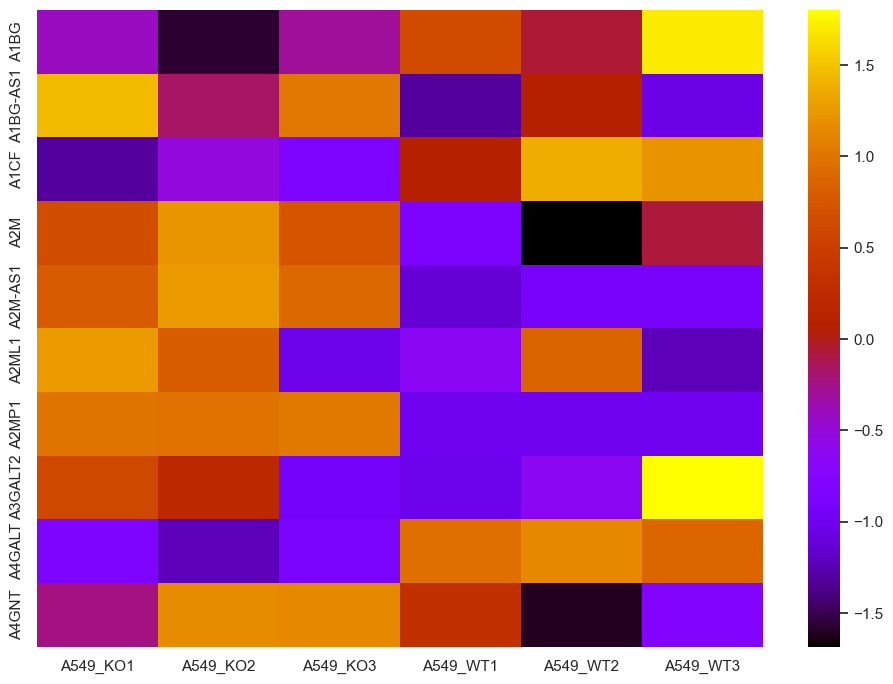

In [9]:
import scipy.stats as st
#calculating zscore of logcpm matrix
zscr=st.zscore(logv)
# converting zscr to dataframe again   
zscr=pd.DataFrame(zscr)
new=zscr.T
# null value replacing with zero
zscr=new.fillna(0)
#converting zscr into array
zscr=zscr.values
#heatmap plot for first 10 genes of zscore   
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(zscr[0:10],xticklabels=data.columns, yticklabels=g1[0:10],annot=False,cmap='gnuplot')
    

In [10]:
#null hypothesis testing
#considering first 3 columns as a tumor class
vec1=logv[0:2]

In [11]:
vec1

array([[1.78139574, 1.13824386, 0.16818715, ..., 8.40421458, 6.86967774,
        6.03320367],
       [1.66940767, 1.01440541, 0.31756322, ..., 8.27952701, 6.79133312,
        6.240761  ]])

In [12]:
#considering  rest columns as a control class
vec2=logv[3:5]

In [13]:
vec2 #control

array([[1.88149795, 0.92753012, 0.42613109, ..., 7.20638086, 6.96038859,
        5.72543931],
       [1.81582891, 1.03219573, 0.67291604, ..., 7.33612128, 7.02375816,
        5.64203396]])

In [14]:
#mean value of vector1 
meanTumor=np.mean(vec1,axis=0)

In [15]:
meanTumor

array([1.7254017 , 1.07632464, 0.24287519, ..., 8.3418708 , 6.83050543,
       6.13698233])

In [16]:
#mean value of vector2
meanControl=np.mean(vec2,axis=0)

In [17]:
meanControl

array([1.84866343, 0.97986292, 0.54952357, ..., 7.27125107, 6.99207337,
       5.68373663])

In [18]:
from scipy.stats import ttest_ind

In [19]:
# ttest for deg identification
pvalue=ttest_ind(vec1,vec2).pvalue

In [20]:
pvalue

array([0.19797986, 0.3562103 , 0.1673839 , ..., 0.00698827, 0.08502287,
       0.05584039])

In [21]:
#calculation of fold change with vec1 and vec2
log2FC=meanTumor-meanControl

In [22]:
log2FC

array([-0.12326173,  0.09646172, -0.30664838, ...,  1.07061973,
       -0.16156794,  0.4532457 ])

In [23]:
#merging all arrays
result=np.stack((meanTumor,meanControl,log2FC,pvalue),axis=0)

In [24]:
result

array([[ 1.72540170e+00,  1.07632464e+00,  2.42875185e-01, ...,
         8.34187080e+00,  6.83050543e+00,  6.13698233e+00],
       [ 1.84866343e+00,  9.79862922e-01,  5.49523567e-01, ...,
         7.27125107e+00,  6.99207337e+00,  5.68373663e+00],
       [-1.23261726e-01,  9.64617172e-02, -3.06648382e-01, ...,
         1.07061973e+00, -1.61567943e-01,  4.53245700e-01],
       [ 1.97979860e-01,  3.56210301e-01,  1.67383903e-01, ...,
         6.98826654e-03,  8.50228701e-02,  5.58403902e-02]])

In [25]:
#converting into dataframe
r=pd.DataFrame(result)
r=r.T

In [26]:
#adding column names
r.columns=["meanTumor","meanControl","log2FC","pvalue"]

In [27]:
#adding index 
r.index=g1

In [28]:
#r["gene"] = r.gene.shift(-1)
#col_1=r.pop('gene')
#r.insert(0,'gene',col_1)

In [29]:
r

,meanTumor,meanControl,log2FC,pvalue
A1BG,1.725402,1.848663,-0.123262,0.197980
A1BG-AS1,1.076325,0.979863,0.096462,0.356210
A1CF,0.242875,0.549524,-0.306648,0.167384
A2M,0.276612,0.116615,0.159997,0.048924
A2M-AS1,1.495257,0.792760,0.702497,0.016682
...,...,...,...,...
ZYG11A,3.204503,3.685249,-0.480746,0.014592
ZYG11B,6.196636,5.770447,0.426189,0.132291
ZYX,8.341871,7.271251,1.070620,0.006988
ZZEF1,6.830505,6.992073,-0.161568,0.085023


In [30]:
#replacing null value with zero
r['pvalue']=r['pvalue'].fillna(1)

In [31]:
r

,meanTumor,meanControl,log2FC,pvalue
A1BG,1.725402,1.848663,-0.123262,0.197980
A1BG-AS1,1.076325,0.979863,0.096462,0.356210
A1CF,0.242875,0.549524,-0.306648,0.167384
A2M,0.276612,0.116615,0.159997,0.048924
A2M-AS1,1.495257,0.792760,0.702497,0.016682
...,...,...,...,...
ZYG11A,3.204503,3.685249,-0.480746,0.014592
ZYG11B,6.196636,5.770447,0.426189,0.132291
ZYX,8.341871,7.271251,1.070620,0.006988
ZZEF1,6.830505,6.992073,-0.161568,0.085023


In [32]:
#saving into csv file
r.to_csv("deg.csv")

In [33]:
#!pip install bioinfokit

In [34]:
from bioinfokit import analys, visuz

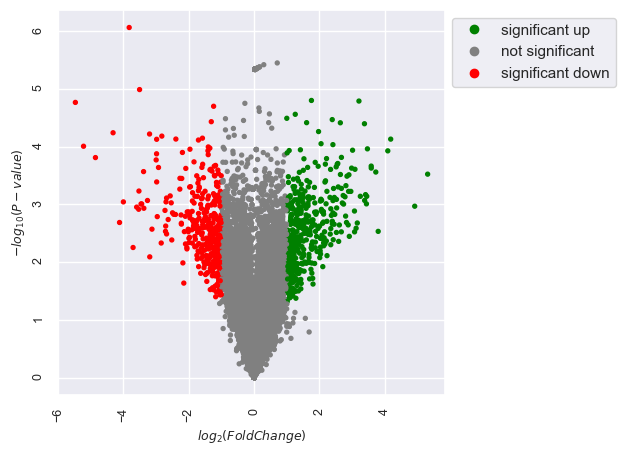

In [35]:
#volcano plot for gene expression analysis
visuz.GeneExpression.volcano(r, lfc='log2FC', pv='pvalue',plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show=True)

In [36]:
visuz.GeneExpression.volcano(r, lfc='log2FC', pv='pvalue',plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1))